In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [1]:
%%javascript
$('.nbp-app-bar').toggle()

<IPython.core.display.Javascript object>

## Merge the `reading` and `weather` datasets

In [3]:
readings=pd.read_csv('readings.csv')
print(readings.shape)
readings.head()

(10506, 12)


,Date,Virus,Month,Year,DayRunner,CULEX,ALTER,PIPIENS,PIPIENS-RESTUANS,RESTUANS,near_hotspot,near_chompspot
0,2007-05-29,0,5,2007,149,PIPIENS-RESTUANS,0,0,1,0,1,4
1,2007-05-29,0,5,2007,149,RESTUANS,0,0,0,1,1,4
2,2007-05-29,0,5,2007,149,RESTUANS,0,0,0,1,0,3
3,2007-05-29,0,5,2007,149,PIPIENS-RESTUANS,0,0,1,0,2,4
4,2007-05-29,0,5,2007,149,RESTUANS,0,0,0,1,2,4


In [4]:
weather=pd.read_csv('weather2.csv')
print(weather.shape)
weather.tail()

(1472, 5)


,Date,avg_rain1,avg_rain2,avg_dry1,avg_dry2
1467,2014-10-27,0.000000,0.571429,0.571429,0.000000
1468,2014-10-28,0.142857,0.428571,0.714286,0.000000
1469,2014-10-29,0.285714,0.285714,0.857143,0.000000
1470,2014-10-30,0.285714,0.142857,0.857143,0.142857
1471,2014-10-31,0.428571,0.142857,0.857143,0.285714


In [5]:
chicago=pd.merge(readings, weather, on='Date').drop('Date', axis=1);
print(chicago.shape)
chicago.head()

(10506, 15)


,Virus,Month,Year,DayRunner,CULEX,ALTER,PIPIENS,PIPIENS-RESTUANS,RESTUANS,near_hotspot,near_chompspot,avg_rain1,avg_rain2,avg_dry1,avg_dry2
0,0,5,2007,149,PIPIENS-RESTUANS,0,0,1,0,1,4,0.714286,0.428571,0.857143,0.571429
1,0,5,2007,149,RESTUANS,0,0,0,1,1,4,0.714286,0.428571,0.857143,0.571429
2,0,5,2007,149,RESTUANS,0,0,0,1,0,3,0.714286,0.428571,0.857143,0.571429
3,0,5,2007,149,PIPIENS-RESTUANS,0,0,1,0,2,4,0.714286,0.428571,0.857143,0.571429
4,0,5,2007,149,RESTUANS,0,0,0,1,2,4,0.714286,0.428571,0.857143,0.571429


In [6]:
chicago.columns

Index(['Virus', 'Month', 'Year', 'DayRunner', 'CULEX', 'ALTER', 'PIPIENS',
       'PIPIENS-RESTUANS', 'RESTUANS', 'near_hotspot', 'near_chompspot',
       'avg_rain1', 'avg_rain2', 'avg_dry1', 'avg_dry2'],
      dtype='object')

# Examine Association of Features with Outcome

### Is the virus higher near hotspots?

near_hotspot
0    0.035997
1    0.070193
2    0.067890
3    0.135417
4    0.096774
Name: Virus, dtype: float64


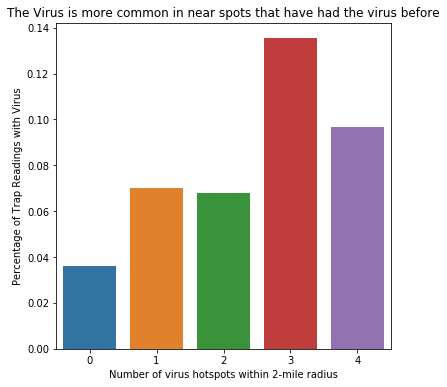

In [27]:
# The virus is least prevalent near zero hotspots, more prevalent when located near 3 or 4 hotspots.
print(chicago.groupby('near_hotspot')['Virus'].mean())
ax = plt.figure(figsize=(6,6))
ax=sns.barplot(y='Virus', x='near_hotspot', data=chicago, ci=None);
ax.set(ylabel='Percentage of Trap Readings with Virus', xlabel='Number of virus hotspots within 2-mile radius',
       Title='The Virus is more common in near spots that have had the virus before');

#### Is the virus higher near spots with high mosquito counts?

near_chompspot
0    0.034546
1    0.053254
2    0.055405
3    0.049826
4    0.087273
5    0.141304
6    0.166667
Name: Virus, dtype: float64


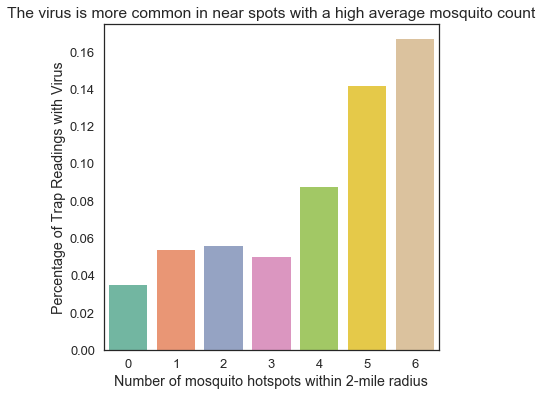

In [49]:
# The virus is least prevalent near zero hotspots, more prevalent when located near 5 or 6 hotspots.
print(chicago.groupby('near_chompspot')['Virus'].mean())
ax = plt.figure(figsize=(6,6))
ax=sns.barplot(y='Virus', x='near_chompspot', data=chicago, ci=None, palette='Set2');
ax.set(ylabel='Percentage of Trap Readings with Virus', xlabel='Number of mosquito hotspots within 2-mile radius',
       Title='The virus is more common in near spots with a high average mosquito count');

### Does the virus occur more frequently in certain months?

Month
5     0.000000
6     0.000637
7     0.017652
8     0.100507
9     0.056357
10    0.007246
Name: Virus, dtype: float64


[Text(0,0.5,'Percentage of Trap Readings with Virus'),
 Text(0.5,1,'August is the Worst Month')]

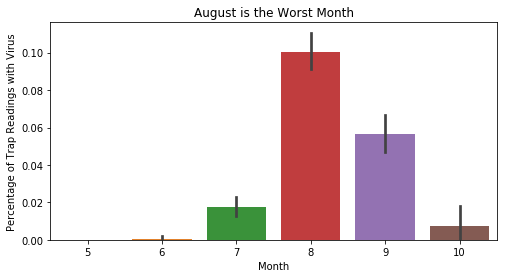

In [9]:
# Month
print(chicago.groupby('Month')['Virus'].mean())
ax=plt.figure(figsize=(8,4))
ax=sns.barplot(x='Month', y='Virus', data=chicago)
ax.set(ylabel='Percentage of Trap Readings with Virus', Title='August is the Worst Month')

### Does the virus appear more frequently in certain types of mosquito?

CULEX
ALTER               0.000000
PIPIENS             0.088922
PIPIENS-RESTUANS    0.055135
RESTUANS            0.017883
Name: Virus, dtype: float64


[Text(0,0.5,'Percentage of Trap Readings with Virus'),
 Text(0.5,1,'PIPIENS is the most frequent carrier species')]

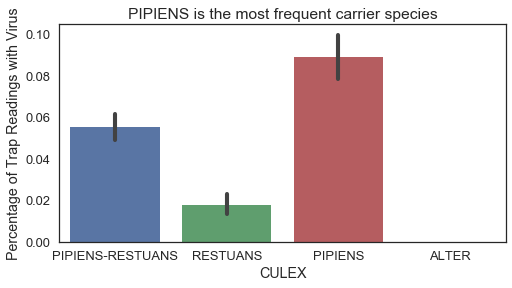

In [43]:
# Species of Mosquito
print(chicago.groupby('CULEX')['Virus'].mean())
sns.set(style="white", context="talk")
ax=plt.figure(figsize=(8,4))
ax=sns.barplot(x='CULEX', y='Virus', data=chicago)
ax.set(ylabel='Percentage of Trap Readings with Virus', Title='PIPIENS is the most frequent carrier species')

In [54]:
# But then again, pipiens is also the most common type of mosquito.

In [11]:
weather.columns

Index(['Date', 'avg_rain1', 'avg_rain2', 'avg_dry1', 'avg_dry2'], dtype='object')

## Is the rainfall of the last 2 weeks important?

In [12]:
# These variables each represent the average of 7 values, where 1=rainy and 0=dry.
print(chicago['avg_rain1'].describe())
print(chicago['avg_rain2'].describe())

count    10506.000000
mean         0.380776
std          0.209197
min          0.000000
25%          0.285714
50%          0.428571
75%          0.571429
max          1.000000
Name: avg_rain1, dtype: float64
count    10506.000000
mean         0.375146
std          0.194982
min          0.000000
25%          0.285714
50%          0.428571
75%          0.571429
max          0.714286
Name: avg_rain2, dtype: float64


In [13]:
# Last week's rain
print(chicago.groupby(['Virus'])['avg_rain1'].mean())
import scipy.stats as stats
print(stats.ttest_ind(chicago[chicago['Virus']==0]['avg_rain1'], chicago[chicago['Virus']==1]['avg_rain1']))

Virus
0    0.380943
1    0.377755
Name: avg_rain1, dtype: float64
Ttest_indResult(statistic=0.34820391880454654, pvalue=0.72769402286601403)


#### There is no significant difference in virus by last week's rain.

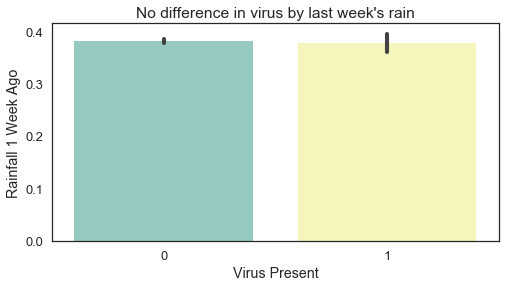

In [42]:
# Visualize that comparison.
ax=plt.figure(figsize=(8,4))
sns.set(style="white", context="talk")
ax = sns.barplot(x='Virus', y='avg_rain1', data=chicago, palette="Set3")
ax.set(ylabel='Rainfall 1 Week Ago', xlabel='Virus Present', Title="No difference in virus by last week's rain");

#### Rain two weeks ago.

In [15]:
# Any sig difference?
print(chicago.groupby(['Virus'])['avg_rain2'].mean())
import scipy.stats as stats
print(stats.ttest_ind(chicago[chicago['Virus']==0]['avg_rain2'], chicago[chicago['Virus']==1]['avg_rain2']))

Virus
0    0.376279
1    0.354680
Name: avg_rain2, dtype: float64
Ttest_indResult(statistic=2.5318100717901872, pvalue=0.011361996839145927)


#### There _is_ a significant difference in virus by rainfall two weeks ago!

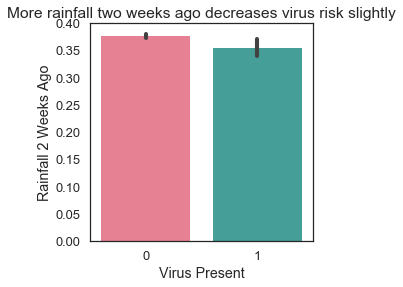

In [52]:
# Visualize that comparison.
ax=plt.figure(figsize=(4,4))
ax = sns.barplot(x='Virus', y='avg_rain2', data=chicago, palette="husl")
ax.set(ylabel='Rainfall 2 Weeks Ago', xlabel='Virus Present',
       Title="More rainfall two weeks ago decreases virus risk slightly");

## Is the dryness of the last 2 weeks important?

In [17]:
# These variables each represent the average of 7 values, where 1=dry and 0=moist.
print(chicago['avg_dry1'].describe())
print(chicago['avg_dry2'].describe())

count    10506.000000
mean         0.405428
std          0.262297
min          0.000000
25%          0.142857
50%          0.428571
75%          0.571429
max          1.000000
Name: avg_dry1, dtype: float64
count    10506.000000
mean         0.433453
std          0.236762
min          0.000000
25%          0.285714
50%          0.428571
75%          0.571429
max          1.000000
Name: avg_dry2, dtype: float64


In [18]:
# Last week's dryness
print(chicago.groupby(['Virus'])['avg_dry1'].mean())
import scipy.stats as stats
print(stats.ttest_ind(chicago[chicago['Virus']==0]['avg_dry1'], chicago[chicago['Virus']==1]['avg_dry1']))

Virus
0    0.409500
1    0.331864
Name: avg_dry1, dtype: float64
Ttest_indResult(statistic=6.7775583329041647, pvalue=1.2877795867361884e-11)


#### There *is* a significant difference in virus by last week's dryness!

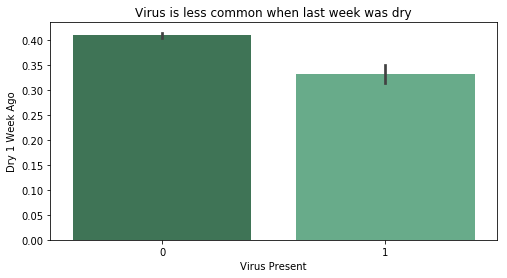

In [39]:
# Visualize that comparison.
ax=plt.figure(figsize=(8,4))
ax = sns.barplot(x='Virus', y='avg_dry1', data=chicago, palette="BuGn_d")
ax.set(ylabel='Humidity 1 Week Ago', xlabel='Virus Present', Title="Virus is more common when last week was dry");

### and Dryness two weeks ago?

In [20]:
# Any sig difference?
print(chicago.groupby(['Virus'])['avg_dry2'].mean())
import scipy.stats as stats
print(stats.ttest_ind(chicago[chicago['Virus']==0]['avg_dry2'], chicago[chicago['Virus']==1]['avg_dry2']))

Virus
0    0.437913
1    0.352865
Name: avg_dry2, dtype: float64
Ttest_indResult(statistic=8.2339565821697747, pvalue=2.0262138932100447e-16)


#### There _is_ a significant difference in virus by dryness two weeks ago!!

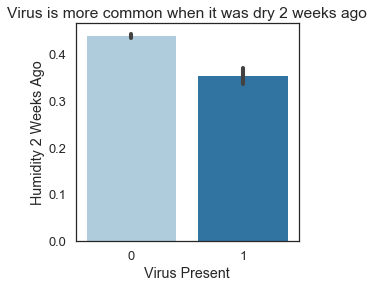

In [51]:
# Visualize that comparison.
ax=plt.figure(figsize=(4,4))
ax = sns.barplot(x='Virus', y='avg_dry2', data=chicago, palette="Paired")
ax.set(ylabel='Humidity 2 Weeks Ago', xlabel='Virus Present',
       Title="Virus is more common when it was dry 2 weeks ago");

# What about the day of the year?

In [22]:
# This variables indicates the day of the year when the trap was read, on a scale of 1 to 365.
print(chicago['DayRunner'].describe())

count    10506.000000
mean       217.941938
std         31.735797
min        148.000000
25%        196.000000
50%        217.000000
75%        241.000000
max        282.000000
Name: DayRunner, dtype: float64


In [23]:
# The average day when the virus is present is LATER in the year (August) than when it is not present.
print(chicago.groupby(['Virus'])['DayRunner'].mean())
import scipy.stats as stats
print(stats.ttest_ind(chicago[chicago['Virus']==0]['DayRunner'], chicago[chicago['Virus']==1]['DayRunner']))

Virus
0    217.152285
1    232.208711
Name: DayRunner, dtype: float64
Ttest_indResult(statistic=-10.901152342644526, pvalue=1.5976366459046119e-27)


#### There *is* a significant difference in virus by date!

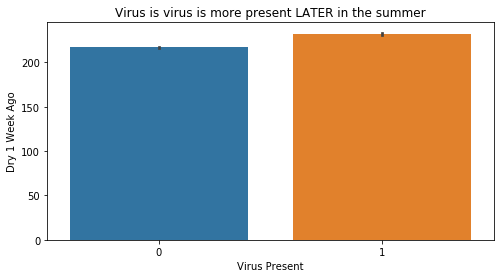

In [24]:
# Visualize that comparison.
ax=plt.figure(figsize=(8,4))
ax = sns.barplot(x='Virus', y='DayRunner', data=chicago)
ax.set(ylabel='Dry 1 Week Ago', xlabel='Virus Present', Title="Virus is more present LATER in the summer");